In [1]:
# SVM Classification
import pandas as pd
import numpy as np
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

### EDA And Data Visualization

In [2]:
sdata_train = pd.read_csv("D:/Data Science/Assignments/Naive Bayes/SalaryData_Train.csv")
sdata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
sdata_test = pd.read_csv("D:/Data Science/Assignments/Naive Bayes/SalaryData_Test.csv")
sdata_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
sdata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
sdata_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
sdata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
sdata_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


Text(0.5, 1.0, 'HeatMap of Features')

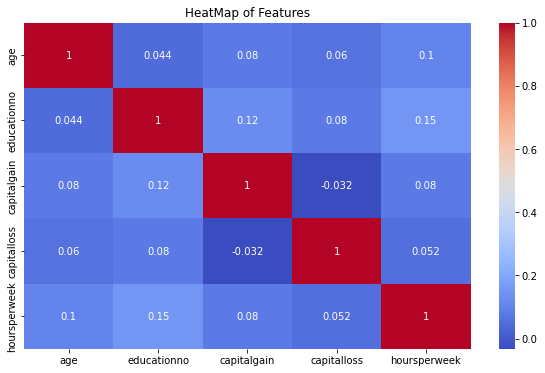

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(sdata_train.corr(),cbar=True, annot=True,cmap="coolwarm")
plt.title("HeatMap of Features")

In [9]:
sdata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
sdata_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
sdata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
sdata_test.shape

(15060, 14)

In [13]:
sdata_test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


Text(0.5, 1.0, 'HeatMap of Features')

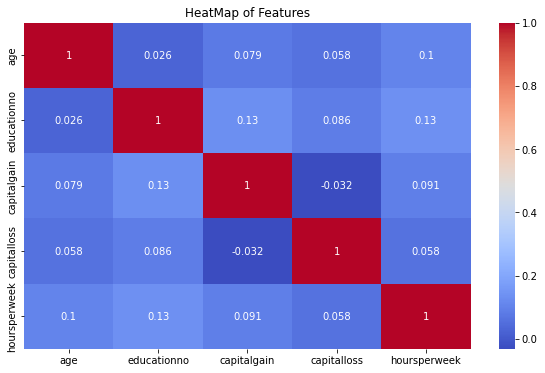

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(sdata_test.corr(),cbar=True, annot=True,cmap="coolwarm")
plt.title("HeatMap of Features")

#### Train Data

<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

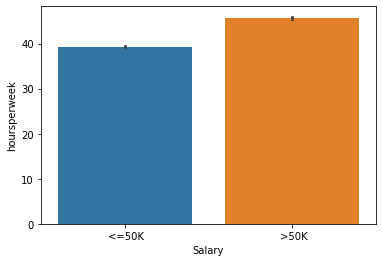

In [15]:
sns.barplot(x='Salary',y='hoursperweek',data=sdata_train)

<AxesSubplot:xlabel='Salary', ylabel='count'>

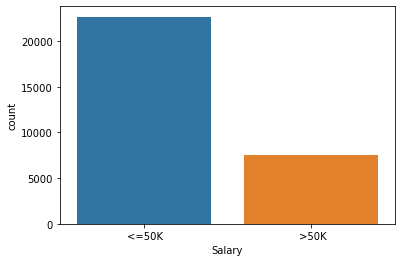

In [16]:
sns.countplot(x='Salary',data =sdata_train)

#### Test Data

<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

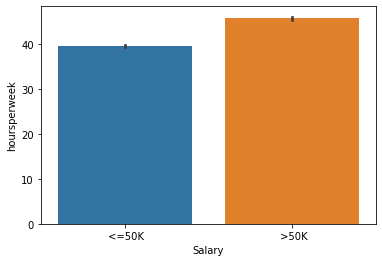

In [17]:
sns.barplot(x='Salary',y='hoursperweek',data=sdata_test)

<AxesSubplot:xlabel='Salary', ylabel='count'>

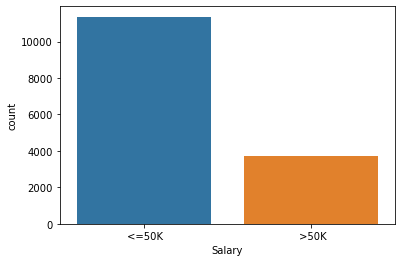

In [18]:
sns.countplot(x='Salary',data =sdata_test)

#### Data Preprocessing

#### To convert all the categorical data to numerical data, We'll use Label Encoder from sklearn.preprocessing import LabelEncoder package

In [19]:
label=LabelEncoder()

In [20]:
sdata_train['workclass']=label.fit_transform(sdata_train['workclass'])

sdata_train['education']=label.fit_transform(sdata_train['education'])

sdata_train['maritalstatus']=label.fit_transform(sdata_train['maritalstatus'])

sdata_train['occupation']=label.fit_transform(sdata_train['occupation'])

sdata_train['relationship']=label.fit_transform(sdata_train['relationship'])

sdata_train['race']=label.fit_transform(sdata_train['race'])

sdata_train['sex']=label.fit_transform(sdata_train['sex'])

sdata_train['native']=label.fit_transform(sdata_train['native'])

sdata_train['Salary']=label.fit_transform(sdata_train['Salary'])

sdata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [21]:
sdata_train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [22]:
sdata_test['workclass']=label.fit_transform(sdata_test['workclass'])

sdata_test['education']=label.fit_transform(sdata_test['education'])

sdata_test['maritalstatus']=label.fit_transform(sdata_test['maritalstatus'])

sdata_test['occupation']=label.fit_transform(sdata_test['occupation'])

sdata_test['relationship']=label.fit_transform(sdata_test['relationship'])

sdata_test['race']=label.fit_transform(sdata_test['race'])

sdata_test['sex']=label.fit_transform(sdata_test['sex'])

sdata_test['native']=label.fit_transform(sdata_test['native'])

sdata_test['Salary']=label.fit_transform(sdata_test['Salary'])

sdata_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [23]:
sdata_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

#### Building Model

In [24]:
X_train=sdata_train.drop(['Salary', 'educationno'],axis=1)
X_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,4,0,1,4,1,2174,0,40,37
1,50,4,9,2,3,0,4,1,0,0,13,37
2,38,2,11,0,5,1,4,1,0,0,40,37
3,53,2,1,2,5,0,2,1,0,0,40,37
4,28,2,9,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37
30157,40,2,11,2,6,0,4,1,0,0,40,37
30158,58,2,11,6,0,4,4,0,0,0,40,37
30159,22,2,11,4,0,3,4,1,0,0,20,37


In [25]:
X_train.shape

(30161, 12)

In [26]:
Y_train=sdata_train['Salary']
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [27]:
Y_train.shape

(30161,)

In [28]:
X_test=sdata_test.drop(['Salary','educationno'],axis=1)
X_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,4,6,3,2,1,0,0,40,37
1,38,2,11,2,4,0,4,1,0,0,50,37
2,28,1,7,2,10,0,4,1,0,0,40,37
3,44,2,15,2,6,0,2,1,7688,0,40,37
4,34,2,0,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37
15056,39,2,9,0,9,1,4,0,0,0,36,37
15057,38,2,9,2,9,0,4,1,0,0,50,37
15058,44,2,9,0,0,3,1,1,5455,0,40,37


In [29]:
X_test.shape

(15060, 12)

In [30]:
Y_test=sdata_test['Salary']
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [31]:
Y_test.shape

(15060,)

#### Training Model Using Grid Search CV

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train, test_size = 0.3)

In [33]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((21112, 12), (21112,), (9049, 12), (9049,))

Linear Regression Model

In [34]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(X_train, Y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(X_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - Y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = X_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

Mean squared Error on test set :  0.15038645589674055
          Columns  Coefficient Estimate
0             age              0.005251
1       workclass             -0.009883
2       education              0.006924
3   maritalstatus             -0.025492
4      occupation              0.004569
5    relationship             -0.021248
6            race              0.015861
7             sex              0.088554
8     capitalgain              0.000011
9     capitalloss              0.000135
10   hoursperweek              0.004706
11         native              0.000624


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

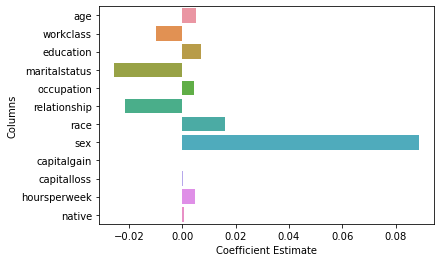

In [35]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

Ridge Regression Model

In [36]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train, Y_train) 
y_pred = ridgeR.predict(X_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - Y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

0.15038655800643191
          Columns  Coefficient Estimate
0             age              0.005251
1       workclass             -0.009882
2       education              0.006924
3   maritalstatus             -0.025491
4      occupation              0.004569
5    relationship             -0.021253
6            race              0.015861
7             sex              0.088525
8     capitalgain              0.000011
9     capitalloss              0.000135
10   hoursperweek              0.004706
11         native              0.000624


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

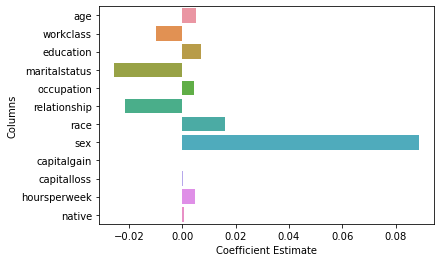

In [37]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

Lasso Regression Model

In [38]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, Y_train) 
y_pred1 = lasso.predict(X_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - Y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 0.1687617130337205
          Columns  Coefficient Estimate
0             age              0.001436
1       workclass              0.000000
2       education              0.000000
3   maritalstatus             -0.000000
4      occupation              0.000000
5    relationship             -0.000000
6            race              0.000000
7             sex              0.000000
8     capitalgain              0.000013
9     capitalloss              0.000161
10   hoursperweek              0.000310
11         native              0.000000


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

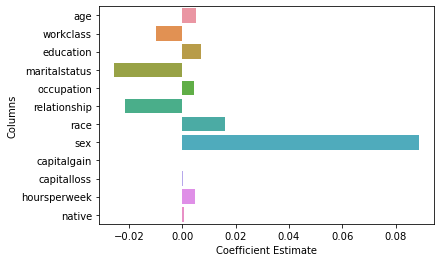

In [39]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

Elastic Net Model

In [40]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(X_train, Y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test) 
mean_squared_error = np.mean((y_pred_elastic - Y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 0.1587200241304686


,Columns,Coefficient Estimate
0,age,0.005650
1,workclass,-0.000000
2,education,0.000000
3,maritalstatus,-0.000000
4,occupation,0.000000
5,relationship,-0.000000
6,race,0.000000
7,sex,0.000000
8,capitalgain,0.000012
9,capitalloss,0.000149


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

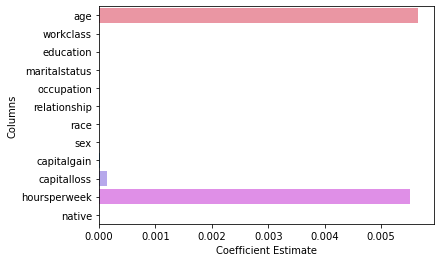

In [41]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff )